# Optimal path algorithms:

## 1. Graph Theory Basics

A graph is a data structure that is defined by two components :

1.   A node or a vertex.

2.   An edge E or ordered pair is a connection between two nodes u,v that is identified by unique pair(u,v). The pair (u,v) is ordered because (u,v) is not same as (v,u) in case of directed graph.The edge may have a weight or is set to one in case of unweighted graph.

Consider the given below graph,

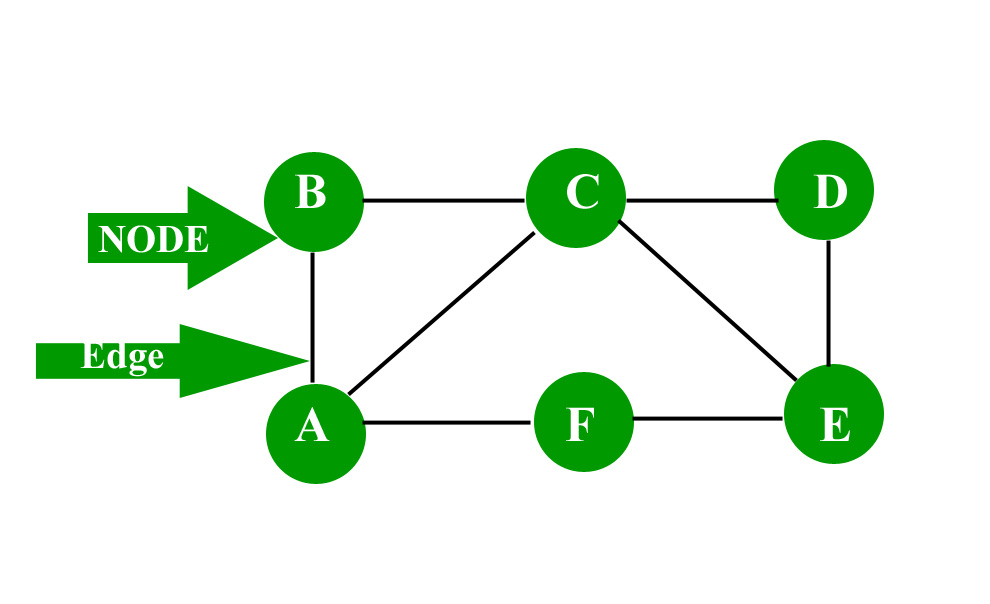

In [4]:
from IPython.display import display, Image
display(Image(filename='graph-5.jpg'))

## Applications

Graph is a data structure which is used extensively in our real-life.


1. **Social Network:** Each user is represented as a node and all their activities,suggestion and friend list are represented as an edge between the nodes.   
2. **Google Maps:** Various locations are represented as vertices or nodes and the roads are represented as edges and graph theory is used to find shortest path between two nodes.
3. **Recommendations on e-commerce websites:** The “Recommendations for you” section on various e-commerce websites uses graph theory to recommend items of similar type to user’s choice.
4. Graph theory is also used to study molecules in chemistry and physics.

## Characteristics of graphs:

1. **Adjacent node:** A node ‘v’ is said to be adjacent node of node ‘u’ if and only if there exists an edge between ‘u’ and ‘v’.
2. **Degree of a node:** In an undirected graph the number of nodes incident on a node is the degree of the node.

*In case of directed graph, **Indegree** of the node is the number of arriving edges to a node. **Outdegree** of the node is the number of departing edges to a node.*

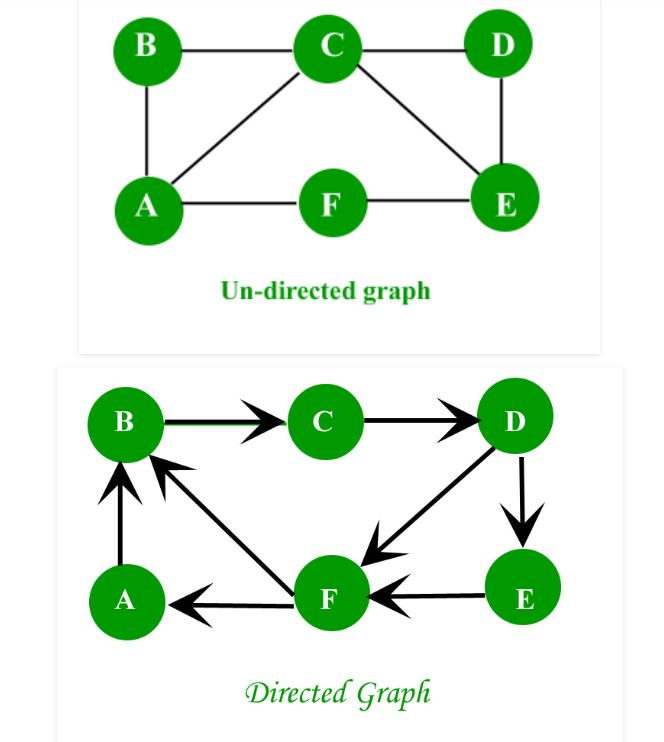

In [5]:
display(Image(filename='graphs.PNG'))

3. **Path:** A path of length ‘n’ from node ‘u’ to node ‘v’ is defined as sequence of n+1 nodes. P(u,v)=(v0,v1,v2,v3…….vn).
- A path is simple if all the nodes are distinct,exception is source and destination are same.

4. **Isolated node:** A node with degree 0 is known as isolated node.

# Shortest Paths


<a id='index-0'></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Contents

- [Shortest Paths](#Shortest-Paths)  
  - [Overview](#Overview)  
  - [Outline of the Problem](#Outline-of-the-Problem)  
  - [Finding Least-Cost Paths](#Finding-Least-Cost-Paths)  
  - [Solving for Minimum Cost-to-Go](#Solving-for-Minimum-Cost-to-Go)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

The shortest path problem is a [classic problem](https://en.wikipedia.org/wiki/Shortest_path) in mathematics and computer science with applications in

- Economics (sequential decision making, analysis of social networks, etc.)  
- Operations research and transportation  
- Robotics and artificial intelligence  
- Telecommunication network design and routing  
- etc., etc.  


Variations of the methods we discuss in this lecture are used millions of times every day, in applications such as

- Google Maps  
- routing packets on the internet  


For us, the shortest path problem also provides a nice introduction to the logic of **dynamic programming**.

Dynamic programming is an extremely powerful optimization technique that we apply in many lectures on this site.

The only scientific library we’ll need in what follows is NumPy:

In [1]:
import numpy as np

## Outline of the Problem

The shortest path problem is one of finding how to traverse a [graph](https://en.wikipedia.org/wiki/Graph_%28mathematics%29) from one specified node to another at minimum cost.

Consider the following graph

![https://python.quantecon.org/_static/lecture_specific/short_path/graph.png](https://python.quantecon.org/_static/lecture_specific/short_path/graph.png)

  
We wish to travel from node (vertex) A to node G at minimum cost

- Arrows (edges) indicate the movements we can take.  
- Numbers on edges indicate the cost of traveling that edge.  


(Graphs such as the one above are called weighted [directed graphs](https://en.wikipedia.org/wiki/Directed_graph).)

Possible interpretations of the graph include

- Minimum cost for supplier to reach a destination.  
- Routing of packets on the internet (minimize time).  
- Etc., etc.  


For this simple graph, a quick scan of the edges shows that the optimal paths are

- A, C, F, G at cost 8  


![https://python.quantecon.org/_static/lecture_specific/short_path/graph4.png](https://python.quantecon.org/_static/lecture_specific/short_path/graph4.png)

  
- A, D, F, G at cost 8  


![https://python.quantecon.org/_static/lecture_specific/short_path/graph3.png](https://python.quantecon.org/_static/lecture_specific/short_path/graph3.png)

## Finding Least-Cost Paths

For large graphs, we need a systematic solution.

Let $ J(v) $ denote the minimum cost-to-go from node $ v $, understood as the total cost from $ v $ if we take the best route.

Suppose that we know $ J(v) $ for each node $ v $, as shown below for the graph from the preceding example

![https://python.quantecon.org/_static/lecture_specific/short_path/graph2.png](https://python.quantecon.org/_static/lecture_specific/short_path/graph2.png)

  
Note that $ J(G) = 0 $.

The best path can now be found as follows

1. Start at node $ v = A $  
1. From current node $ v $, move to any node that solves  



<a id='equation-spprebell'></a>
$$
\min_{w \in F_v} \{ c(v, w) + J(w) \} \tag{28.1}
$$

where

- $ F_v $ is the set of nodes that can be reached from $ v $ in one step.  
- $ c(v, w) $ is the cost of traveling from $ v $ to $ w $.  


Hence, if we know the function $ J $, then finding the best path is almost trivial.

But how can we find the cost-to-go function $ J $?

Some thought will convince you that, for every node $ v $,
the function $ J $ satisfies


<a id='equation-spbell'></a>
$$
J(v) = \min_{w \in F_v} \{ c(v, w) + J(w) \} \tag{28.2}
$$

This is known as the *Bellman equation*, after the mathematician Richard Bellman.

The Bellman equation can be thought of as a restriction that $ J $ must
satisfy.

What we want to do now is use this restriction to compute $ J $.

## Solving for Minimum Cost-to-Go

Let’s look at an algorithm for computing $ J $ and then think about how to
implement it.

### The Algorithm

The standard algorithm for finding $ J $ is to start an initial guess and then iterate.

This is a standard approach to solving nonlinear equations, often called
the method of **successive approximations**.

Our initial guess will be


<a id='equation-spguess'></a>
$$
J_0(v) = 0 \text{ for all } v \tag{28.3}
$$

Now

1. Set $ n = 0 $  
1. Set $ J_{n+1} (v) = \min_{w \in F_v} \{ c(v, w) + J_n(w) \} $ for all $ v $  
1. If $ J_{n+1} $ and $ J_n $ are not equal then increment $ n $, go to 2  


This sequence converges to $ J $.

Although we omit the proof, we’ll prove similar claims in our other lectures
on dynamic programming.

### Implementation

Having an algorithm is a good start, but we also need to think about how to
implement it on a computer.

First, for the cost function $ c $, we’ll implement it as a matrix
$ Q $, where a typical element is

$$
Q(v, w)
=
\begin{cases}
   & c(v, w) \text{ if } w \in F_v \\
   & +\infty \text{ otherwise }
\end{cases}
$$

In this context $ Q $ is usually called the **distance matrix**.

We’re also numbering the nodes now, with $ A = 0 $, so, for example

$$
Q(1, 2)
=
\text{ the cost of traveling from B to C }
$$

For example, for the simple graph above, we set

In [2]:
from numpy import inf
#graphe 1
#              A    B    C    D    E    F    G
Q1 = np.array([[inf, 1,   5,   3,   inf, inf, inf], # A
              [inf, inf, inf, 9,   6,   inf, inf], # B
              [inf, inf, inf, inf, inf, 2,   inf], # C  
              [inf, inf, inf, inf, inf, 4,   8],   # D
              [inf, inf, inf, inf, inf, inf, 4],   # E
              [inf, inf, inf, inf, inf, inf, 1],   # F
              [inf, inf, inf, inf, inf, inf, 0]])  # G


Notice that the cost of staying still (on the principle diagonal) is set to

- np.inf for non-destination nodes — moving on is required.  
- 0 for the destination node — here is where we stop.  


For the sequence of approximations $ \{J_n\} $ of the cost-to-go functions, we can use NumPy arrays.

Let’s try with this example and see how we go:

In [10]:
def LCP(Q,dv): #dv is the destination vertex
    for i in range(len(Q)):
        Q[i,i]=inf
    Q[dv,dv]=0 # destination vertex
    nodes = range(len(Q))                              # Nodes = 0, 1, ...
    J = np.zeros_like(nodes, dtype=int)        # Initial guess
    next_J = np.empty_like(nodes, dtype=int)   # Stores updated guess

    max_iter = 500
    i = 0
    
    while i < max_iter:
        for v in nodes:
            # minimize Q[v, w] + J[w] over all choices of w
            lowest_cost = inf
            for w in nodes:
                cost = Q[v, w] + J[w]
                if cost < lowest_cost:
                    lowest_cost = cost
                    p=w    

            next_J[v] = lowest_cost
            P[p]=v
        if np.equal(next_J, J).all():
            break
        else:
            J[:] = next_J   # Copy contents of next_J to J
            i += 1

    print("The cost-to-go function is", J,i)
Nodes=["A","B","C","D","E","F","G"]

dv=6 # G is the destination vertex 
print("\ndestination vertex: ",Nodes[dv])
PCC(Q1,dv)  

dv=5 # F is the destination vertex 
print("\ndestination vertex: ",Nodes[dv])
PCC(Q1,dv) 



destination vertex:  G


NameError: ignored

In [ ]:

#Graphe 2
#              A    B    C    D    E    F    G
Q2 = np.array([[inf, 1,   5,   3,   inf, inf, inf], # A
              [inf, inf, inf, 9,   6,   inf, inf], # B
              [inf, inf, inf, inf, inf, 2,   inf], # C  
              [inf, inf, inf, inf, inf, 4,   8],   # D
              [inf, inf, inf, inf, inf, inf, inf],   # E
              [inf, inf, inf, inf, inf, inf, 1],   # F
              [inf, inf, inf, inf, inf, inf, inf]])  # G

#graphe 3
#              A    B    C    D    E    F    G
Q3 = np.array([[inf, 1,   5,   3,   inf, inf, inf], # A
              [inf, inf, inf, 9,   6,   inf, inf], # B
              [inf, inf, inf, inf, inf, 2,   inf], # C  
              [inf, inf, inf, inf, inf, 4,   inf],   # D
              [inf, inf, inf, inf, inf, inf, inf],   # E
              [inf, inf, inf, inf, inf, inf, 1],   # F
              [inf, inf, inf, 8, inf, inf, inf]])  # G
#graphe 4
#              A    B    C    D    E    F    G
Q4 = np.array([[inf, 1,   5,   3,   inf, inf, inf], # A
              [inf, inf, inf, 9,   6,   inf, inf], # B
              [inf, inf, inf, inf, inf, 2,   inf], # C  
              [inf, inf, inf, inf, inf, 4,   inf],   # D
              [inf, inf, inf, inf, inf, inf, inf],   # E
              [inf, inf, inf, inf, inf, inf, 1],   # F
              [inf, 8, inf, inf, inf, inf, inf]])  # G

#graphe 5
#              A    B    C    D    
Q5 = np.array([[inf, 2, 1  ,5   ], #A 
              [2,inf , 1  , 1  ],  #B
              [1, 1,   inf,4   ],  #C
              [5, 1,   4,inf   ]]) #D


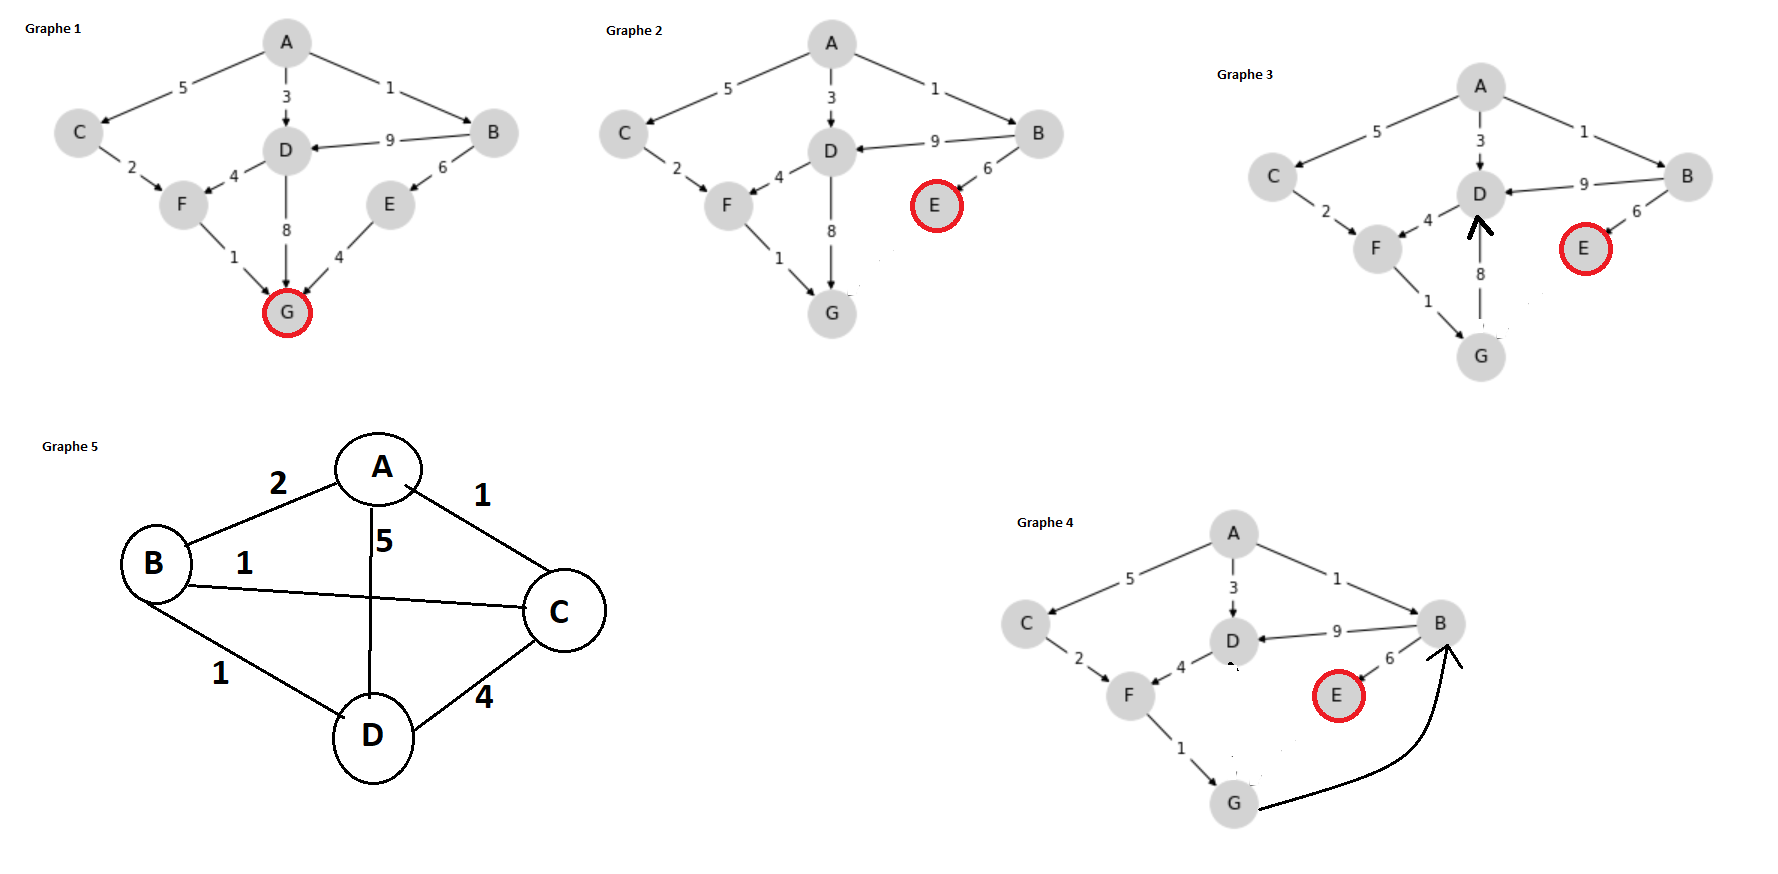

In [9]:
display(Image(filename='pcc.png'))

In [ ]:
# other test
dv=4 # E is the destination vertex 
print("\nGraphe 4 - destination vertex: ",Nodes[dv])
PCC(Q4,dv)

dv=3 # D is the destination vertex 
print("\nGraphe 5 - destination vertex: ",Nodes[dv])
PCC(Q5,dv)

dv=4 # E is the destination vertex 
print("\nGraphe 3 - destination vertex: ",Nodes[dv])
PCC(Q3,dv)

dv=4 # E is the destination vertex 
print("\nGraphe 2 - destination vertex: ",Nodes[dv])
PCC(Q2,dv)



Graphe 4 - destination vertex:  E
The cost-to-go function is [ 7  6 17 19  0 15 14] 4

Graphe 5 - destination vertex:  D
The cost-to-go function is [3 1 2 0] 3

Graphe 3 - destination vertex:  E
The cost-to-go function is [   7    6 2161 2163    0 2167 2170] 500

Graphe 2 - destination vertex:  E


OverflowError: cannot convert float infinity to integer

This matches with the numbers we obtained by inspection above.

But, importantly, we now have a methodology for tackling large graphs.

## Exercises


<a id='short-path-ex1'></a>

### Exercise 1

The text below describes a weighted directed graph.

The line `node0, node1 0.04, node8 11.11, node14 72.21` means that from node0 we can go to

- node1 at cost 0.04  
- node8 at cost 11.11  
- node14 at cost 72.21  


No other nodes can be reached directly from node0.

Other lines have a similar interpretation.

Your task is to use the algorithm given above to find the optimal path and its cost.

Note: You will be dealing with floating point numbers now, rather than
integers, so consider replacing `np.equal()` with `np.allclose()`.

In [ ]:
%%file graph.txt
node0, node1 0.04, node8 11.11, node14 72.21
node1, node46 1247.25, node6 20.59, node13 64.94
node2, node66 54.18, node31 166.80, node45 1561.45
node3, node20 133.65, node6 2.06, node11 42.43
node4, node75 3706.67, node5 0.73, node7 1.02
node5, node45 1382.97, node7 3.33, node11 34.54
node6, node31 63.17, node9 0.72, node10 13.10
node7, node50 478.14, node9 3.15, node10 5.85
node8, node69 577.91, node11 7.45, node12 3.18
node9, node70 2454.28, node13 4.42, node20 16.53
node10, node89 5352.79, node12 1.87, node16 25.16
node11, node94 4961.32, node18 37.55, node20 65.08
node12, node84 3914.62, node24 34.32, node28 170.04
node13, node60 2135.95, node38 236.33, node40 475.33
node14, node67 1878.96, node16 2.70, node24 38.65
node15, node91 3597.11, node17 1.01, node18 2.57
node16, node36 392.92, node19 3.49, node38 278.71
node17, node76 783.29, node22 24.78, node23 26.45
node18, node91 3363.17, node23 16.23, node28 55.84
node19, node26 20.09, node20 0.24, node28 70.54
node20, node98 3523.33, node24 9.81, node33 145.80
node21, node56 626.04, node28 36.65, node31 27.06
node22, node72 1447.22, node39 136.32, node40 124.22
node23, node52 336.73, node26 2.66, node33 22.37
node24, node66 875.19, node26 1.80, node28 14.25
node25, node70 1343.63, node32 36.58, node35 45.55
node26, node47 135.78, node27 0.01, node42 122.00
node27, node65 480.55, node35 48.10, node43 246.24
node28, node82 2538.18, node34 21.79, node36 15.52
node29, node64 635.52, node32 4.22, node33 12.61
node30, node98 2616.03, node33 5.61, node35 13.95
node31, node98 3350.98, node36 20.44, node44 125.88
node32, node97 2613.92, node34 3.33, node35 1.46
node33, node81 1854.73, node41 3.23, node47 111.54
node34, node73 1075.38, node42 51.52, node48 129.45
node35, node52 17.57, node41 2.09, node50 78.81
node36, node71 1171.60, node54 101.08, node57 260.46
node37, node75 269.97, node38 0.36, node46 80.49
node38, node93 2767.85, node40 1.79, node42 8.78
node39, node50 39.88, node40 0.95, node41 1.34
node40, node75 548.68, node47 28.57, node54 53.46
node41, node53 18.23, node46 0.28, node54 162.24
node42, node59 141.86, node47 10.08, node72 437.49
node43, node98 2984.83, node54 95.06, node60 116.23
node44, node91 807.39, node46 1.56, node47 2.14
node45, node58 79.93, node47 3.68, node49 15.51
node46, node52 22.68, node57 27.50, node67 65.48
node47, node50 2.82, node56 49.31, node61 172.64
node48, node99 2564.12, node59 34.52, node60 66.44
node49, node78 53.79, node50 0.51, node56 10.89
node50, node85 251.76, node53 1.38, node55 20.10
node51, node98 2110.67, node59 23.67, node60 73.79
node52, node94 1471.80, node64 102.41, node66 123.03
node53, node72 22.85, node56 4.33, node67 88.35
node54, node88 967.59, node59 24.30, node73 238.61
node55, node84 86.09, node57 2.13, node64 60.80
node56, node76 197.03, node57 0.02, node61 11.06
node57, node86 701.09, node58 0.46, node60 7.01
node58, node83 556.70, node64 29.85, node65 34.32
node59, node90 820.66, node60 0.72, node71 0.67
node60, node76 48.03, node65 4.76, node67 1.63
node61, node98 1057.59, node63 0.95, node64 4.88
node62, node91 132.23, node64 2.94, node76 38.43
node63, node66 4.43, node72 70.08, node75 56.34
node64, node80 47.73, node65 0.30, node76 11.98
node65, node94 594.93, node66 0.64, node73 33.23
node66, node98 395.63, node68 2.66, node73 37.53
node67, node82 153.53, node68 0.09, node70 0.98
node68, node94 232.10, node70 3.35, node71 1.66
node69, node99 247.80, node70 0.06, node73 8.99
node70, node76 27.18, node72 1.50, node73 8.37
node71, node89 104.50, node74 8.86, node91 284.64
node72, node76 15.32, node84 102.77, node92 133.06
node73, node83 52.22, node76 1.40, node90 243.00
node74, node81 1.07, node76 0.52, node78 8.08
node75, node92 68.53, node76 0.81, node77 1.19
node76, node85 13.18, node77 0.45, node78 2.36
node77, node80 8.94, node78 0.98, node86 64.32
node78, node98 355.90, node81 2.59
node79, node81 0.09, node85 1.45, node91 22.35
node80, node92 121.87, node88 28.78, node98 264.34
node81, node94 99.78, node89 39.52, node92 99.89
node82, node91 47.44, node88 28.05, node93 11.99
node83, node94 114.95, node86 8.75, node88 5.78
node84, node89 19.14, node94 30.41, node98 121.05
node85, node97 94.51, node87 2.66, node89 4.90
node86, node97 85.09
node87, node88 0.21, node91 11.14, node92 21.23
node88, node93 1.31, node91 6.83, node98 6.12
node89, node97 36.97, node99 82.12
node90, node96 23.53, node94 10.47, node99 50.99
node91, node97 22.17
node92, node96 10.83, node97 11.24, node99 34.68
node93, node94 0.19, node97 6.71, node99 32.77
node94, node98 5.91, node96 2.03
node95, node98 6.17, node99 0.27
node96, node98 3.32, node97 0.43, node99 5.87
node97, node98 0.30
node98, node99 0.33
node99,

Overwriting graph.txt


## Solutions

### Exercise 1

First let’s write a function that reads in the graph data above and builds a distance matrix.

In [ ]:
num_nodes = 100
destination_node = 99

def map_graph_to_distance_matrix(in_file):

    # First let's set of the distance matrix Q with inf everywhere
    Q = np.full((num_nodes, num_nodes), np.inf)

    # Now we read in the data and modify Q
    infile = open(in_file)
    for line in infile:
        elements = line.split(',')
        node = elements.pop(0)
        node = int(node[4:])    # convert node description to integer
        if node != destination_node:
            for element in elements:
                destination, cost = element.split()
                destination = int(destination[4:])
                Q[node, destination] = float(cost)
        Q[destination_node, destination_node] = 0

    infile.close()
    return Q

In addition, let’s write

1. a “Bellman operator” function that takes a distance matrix and current guess of J and returns an updated guess of J, and  
1. a function that takes a distance matrix and returns a cost-to-go function.  


We’ll use the algorithm described above.

The minimization step is vectorized to make it faster.

In [ ]:
def bellman(J, Q):
    num_nodes = Q.shape[0]
    next_J = np.empty_like(J)
    for v in range(num_nodes):
        next_J[v] = np.min(Q[v, :] + J)
    return next_J


def compute_cost_to_go(Q):
    num_nodes = Q.shape[0]
    J = np.zeros(num_nodes)      # Initial guess
    max_iter = 500
    i = 0

    while i < max_iter:
        next_J = bellman(J, Q)
        if np.allclose(next_J, J):
            break
        else:
            J[:] = next_J   # Copy contents of next_J to J
            i += 1

    return(J)

We used np.allclose() rather than testing exact equality because we are
dealing with floating point numbers now.

Finally, here’s a function that uses the cost-to-go function to obtain the
optimal path (and its cost).

In [ ]:
def print_best_path(J, Q,dv):#dv is the destination vertex
    sum_costs = 0
    current_node = dv
    while current_node != destination_node:
        print(current_node,end=" => ")
        # Move to the next node and increment costs
        next_node = np.argmin(Q[current_node, :] + J)
        sum_costs += Q[current_node, next_node]
        current_node = next_node

    print(destination_node)
    print('Cost: ', sum_costs)

Okay, now we have the necessary functions, let’s call them to do the job we were assigned.

In [ ]:
Q = map_graph_to_distance_matrix('graph.txt')
J = compute_cost_to_go(Q)
print_best_path(J, Q,15)

15 => 18 => 23 => 33 => 41 => 53 => 56 => 57 => 60 => 67 => 70 => 73 => 76 => 85 => 87 => 88 => 93 => 94 => 96 => 97 => 98 => 99
Cost:  107.01


The total cost of the path should agree with $ J[0] $ so let’s check this.

In [ ]:
J[15]

107.01

# Dijkstra's algorithm:

Dijkstra's algorithm is used to solve the shortest path problem
More precisely, it calculates shortest paths from a source to all other vertices in a directed graph weighted by positive reals.

# Algorithm:
Initially, we consider that the distances from each vertex to the starting vertex are infinite, except for the starting vertex for which the distance is zero. The starting subgraph is the empty set.

During each iteration, a minimum distance vertex is chosen outside the subgraph and added to the subgraph. Next, we update the distances of the neighboring vertices of the added one. The update works as follows: the new distance from the neighboring vertex is the minimum between the existing distance and that obtained by adding the weight of the arc between the neighboring vertex and the added vertex to the distance of the added vertex.

We continue in this way until the vertices are exhausted (or until the arrival vertex is selected)


# Application:
we want to calculate the minimum distance between the houses of a village.



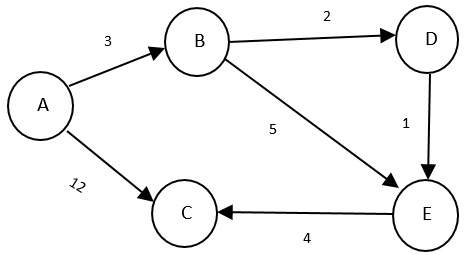

In [11]:
display(Image(filename='dijikstra.jpeg'))

In [12]:
def dijkstra(village, source='A'):
    assert all(village[u][v] >= 0 for u in village.keys() for v in village[u].keys())
    precedent = {x:None for x in village.keys()}
    dejaTraite = {x:False for x in village.keys()}
    distance =  {x:float('inf') for x in village.keys()}
    distance[source] = 0
    a_traiter = [(0, source)]
    while a_traiter:
        dist_noeud, noeud = a_traiter.pop()
        if not dejaTraite[noeud]:
            dejaTraite[noeud] = True
            for voisin in village[noeud].keys():
                dist_voisin = dist_noeud + village[noeud][voisin]
                if dist_voisin < distance[voisin]:
                    distance[voisin] = dist_voisin
                    precedent[voisin] = noeud
                    a_traiter.append((dist_voisin, voisin))
        a_traiter.sort(reverse=True)
    return distance, precedent

village={}
village['A']={'B':3,'C':12}
village['B']={'A':3,'E':5,'D':2}
village['D']={'B':2,'E':1}
village['E']={'D':1,'C':4,'B':5}
village['C']={'E':4,'A':12}

distance, precedent = dijkstra(village)
print('Distances minimum :',distance)
print('Liste des précédents :', precedent)

Distances minimum : {'A': 0, 'B': 3, 'D': 5, 'E': 6, 'C': 10}
Liste des précédents : {'A': None, 'B': 'A', 'D': 'B', 'E': 'D', 'C': 'E'}


# The Bellman–Ford algorithm

This algorithm is an algorithm that computes shortest paths from a single source vertex to all of the other vertices in a weighted digraph.

It is slower than Dijkstra's algorithm for the same problem, but more versatile, as it is capable of handling graphs in which some of the edge weights are negative numbers. The algorithm was first proposed by Alfonso Shimbel (1955), but is instead named after Richard Bellman and Lester Ford Jr., who published it in 1958 and 1956, respectively.


# How Bellman Ford's algorithm works

Bellman Ford algorithm works by overestimating the length of the path from the starting vertex to all other vertices. Then it iteratively relaxes those estimates by finding new paths that are shorter than the previously overestimated paths.

**Why would one ever have edges with negative weights in real life?**

Negative weight edges might seem useless at first but they can explain a lot of phenomena like cashflow, the heat released/absorbed in a chemical reaction, etc.

# Example 1: Bellman-Ford (negative weights & cycles)

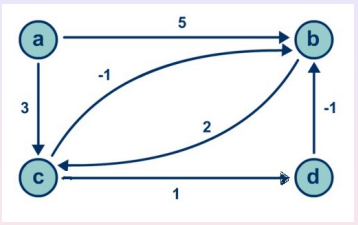

In [13]:
from IPython.display import display, Image
display(Image(filename='neg.PNG'))

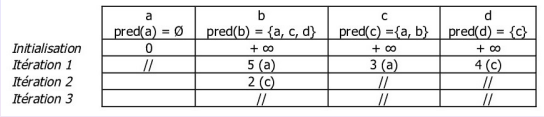

In [14]:
display(Image(filename='res.PNG'))

**Side Note** : Negative weight edges can create negative weight cycles i.e. a cycle that will reduce the total path distance by coming back to the same point.

# Example of Ford-Bellman algorithm in python

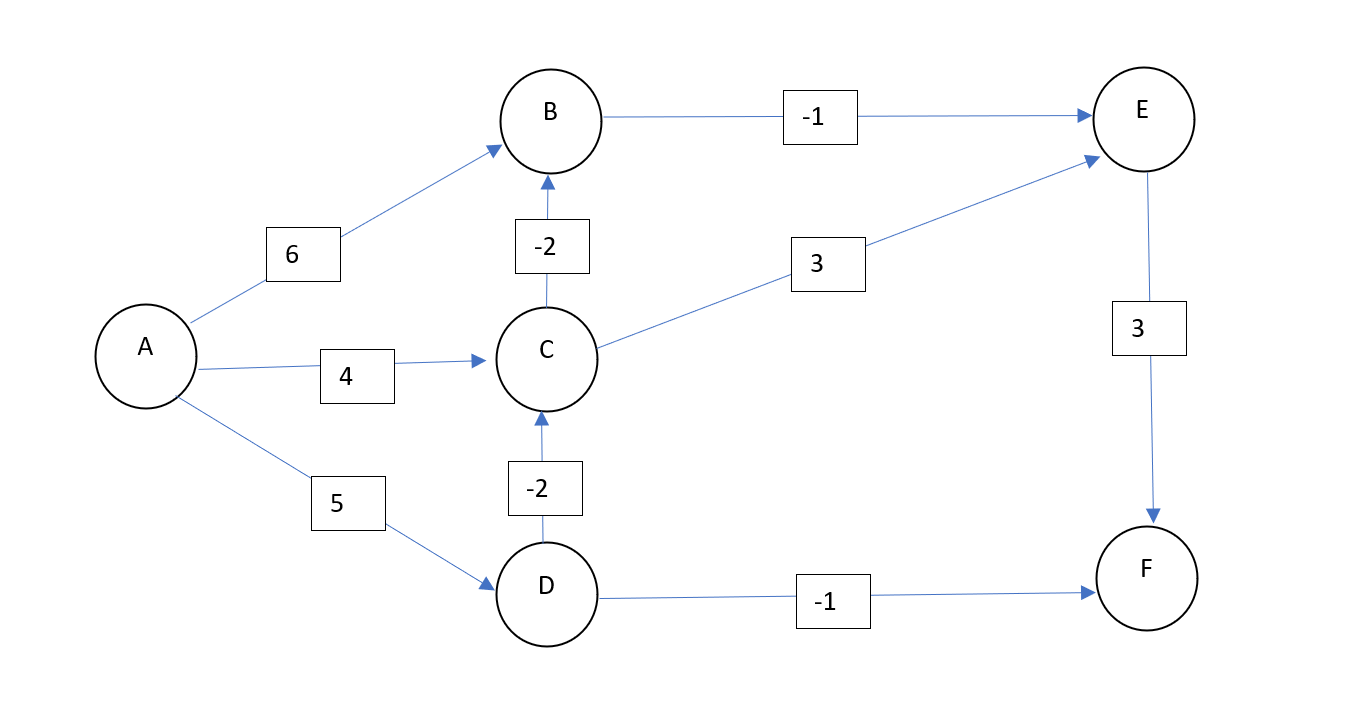

In [15]:
display(Image(filename='Capture.PNG'))

### How the algorithm works? 

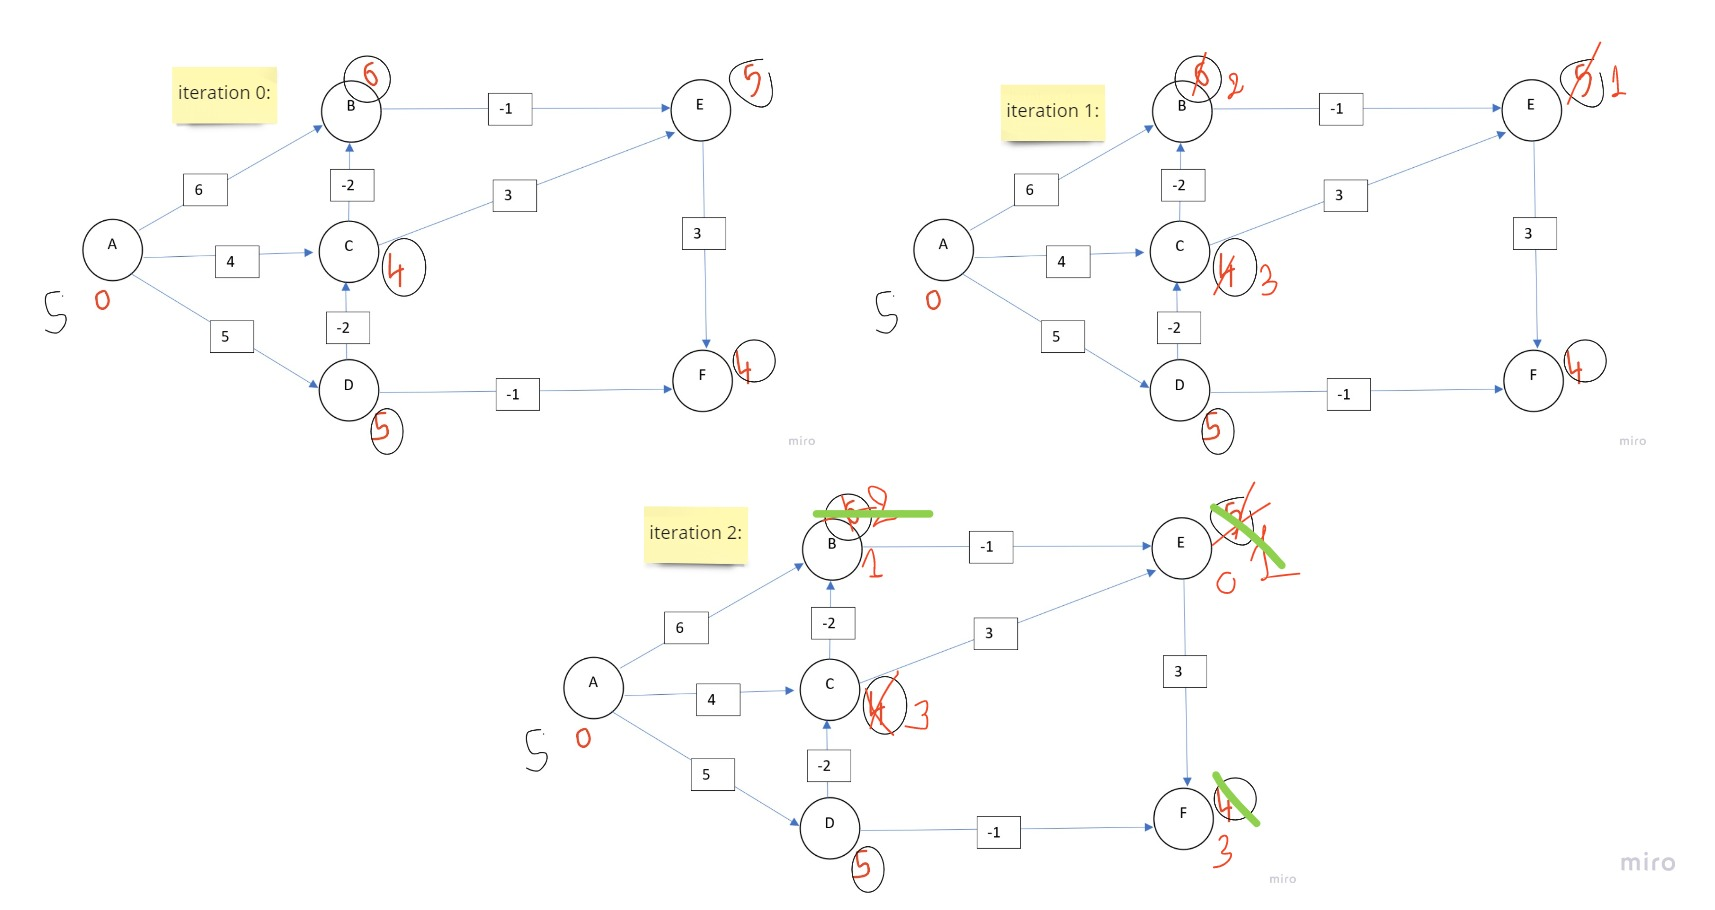

In [18]:
display(Image(filename='bellman.jpg'))

## Coding the bellman algorithm in python

In [19]:
import sys 

def bellmanford(graph,src,dest):
    inf = sys.maxsize
    node_data = {'A' : {'cost': inf, 'pred' : []},
    'B' :{'cost' : inf, 'pred' : []},
    'C' :{'cost' : inf, 'pred' : []},
    'D' :{'cost' : inf, 'pred' : []},
    'E' :{'cost' : inf, 'pred' : []},
    'F' :{'cost' : inf, 'pred' : []}
    }
    node_data[src]['cost']=0
    for i in range(5): 
        print('Iteration ' +str(i))
        for itr in graph:
            for neighbor in graph[itr]:
                cost = node_data[itr]['cost'] + graph[itr][neighbor]
                if cost < node_data[neighbor]['cost']:
                    node_data[neighbor]['cost'] = cost
                    if node_data[neighbor]['cost'] == inf:
                        node_data[neighbor]['pred'] = node_data[itr]['pred'] + list(itr) 
                    else:
                        node_data[neighbor]['pred'].clear()
                        node_data[neighbor]['pred'] = node_data[itr]['pred'] + list(itr)

            print(node_data)
        print("Shortest Distance: " + str(node_data[dest]['cost']))
        print("Shortest Path: " + str(node_data[dest]['pred'] + list(dest)))

    
    
if __name__ == "__main__":
    graph = {
        'A':{'B':6, 'C':4, 'D':5},
        'B':{'E':-1},
        'C':{'B':-2, 'E':3},
        'D':{'C':-2, 'F':-1},
        'E':{'F':3},
        'F':{}
    }

    source = 'A'

    destination = 'E'

bellmanford(graph, source, destination)



Iteration 0
{'A': {'cost': 0, 'pred': []}, 'B': {'cost': 6, 'pred': ['A']}, 'C': {'cost': 4, 'pred': ['A']}, 'D': {'cost': 5, 'pred': ['A']}, 'E': {'cost': 9223372036854775807, 'pred': []}, 'F': {'cost': 9223372036854775807, 'pred': []}}
{'A': {'cost': 0, 'pred': []}, 'B': {'cost': 6, 'pred': ['A']}, 'C': {'cost': 4, 'pred': ['A']}, 'D': {'cost': 5, 'pred': ['A']}, 'E': {'cost': 5, 'pred': ['A', 'B']}, 'F': {'cost': 9223372036854775807, 'pred': []}}
{'A': {'cost': 0, 'pred': []}, 'B': {'cost': 2, 'pred': ['A', 'C']}, 'C': {'cost': 4, 'pred': ['A']}, 'D': {'cost': 5, 'pred': ['A']}, 'E': {'cost': 5, 'pred': ['A', 'B']}, 'F': {'cost': 9223372036854775807, 'pred': []}}
{'A': {'cost': 0, 'pred': []}, 'B': {'cost': 2, 'pred': ['A', 'C']}, 'C': {'cost': 3, 'pred': ['A', 'D']}, 'D': {'cost': 5, 'pred': ['A']}, 'E': {'cost': 5, 'pred': ['A', 'B']}, 'F': {'cost': 4, 'pred': ['A', 'D']}}
{'A': {'cost': 0, 'pred': []}, 'B': {'cost': 2, 'pred': ['A', 'C']}, 'C': {'cost': 3, 'pred': ['A', 'D']}, 'D